# Request
Show us a visual representation that explores danceability, popularity, and song key. Potential questions that could be asked are: What song key has the most danceability? How does popularity and song key relate? Are the most popular songs also the most danceable?

# In this notebook
- Averages
- Min and max
- Other plots to try and get a better understanding of the data
- Quick conclusions

# Setup
This notebook needs the following Python libraries:
- matplotlib
- pandas
- sqlite3
- numpy
- seaborn

# Comments
Most of what I've done code wise could be simplified with using dataframes exclusively. I've leveraged SQL mostly because of my experience with it, but I believe much of what I could written, if I had a little more time, could be refactored and simplified. 

This was my first exposure to leveraging seaborn and matplotlib, so I enjoyed the opportunity to learn about these as I went along with this assignment. Much of what was done here I learned from Youtube and observing other work on Kaggle.com, and could also be simplified or enhanced (adding color graphs/heat maps to tables for example) if I could spend more time reviewing the documentation.

The graphs and tables in this notebook were done on a wide-screen monitor - some of the code may need to be adjusted to view on other resolutions.


### Averages

#### Approach

 - Load data from "music_genre.csv" in folder using pandas. 
 - Save the data frame back to SQLite for convenience. 
    - Note that when we pull data out of sqlite we're normalizing popularity to make it easier to chart (trying to get the value between 0 and 1).
 - Plot items using pyplot from matlab and others.
 - (Stretch Goal) Output to tables, coloring max/min values if possible. Alternatively, be explicit about min/max values, etc.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sqlite3
import numpy as np

# read csv
data = pd.read_csv('music_genre.csv')

# sort the data by key
# I would like to revisit this approach as there may be a better way to do this without duplicate the data
plot_data = data.sort_values(by='key')

# create an in-memory sqlite database and save the data frame to it
# used to using sql, although we can use sql against dataframes as well
conn = sqlite3.connect(":memory:")
data.to_sql(name='music', con=conn)

# get the average by key
# we multiply the popularity by 0.01 to try and normalize (produce a value between 0 and 1)
query = """SELECT 
                key,
                ROUND(AVG(danceability), 3) avg_dance, 
                ROUND(AVG(popularity) * 0.01, 3) avg_pop
            FROM 
                music
            WHERE
                danceability IS NOT NULL
            AND
                popularity IS NOT NULL                 
            GROUP BY 
                key"""

data_avg = pd.read_sql(query, conn)


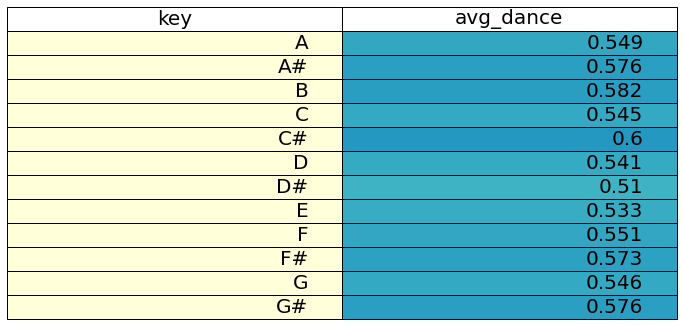

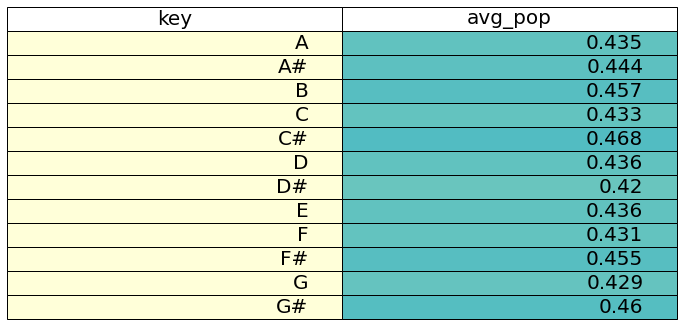

The minimum average dance value is:  0.51 by key  D#
The maximum average dance value is:  0.6 by key  C#
The minimum average pop value is:  0.42 by key  D#
The maximum average pop value is:  0.468 by key  C#


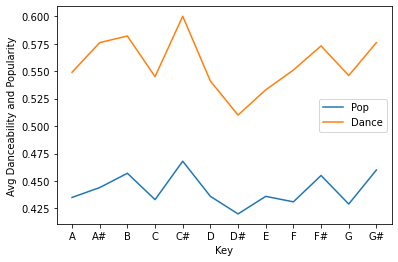

In [26]:

# https://www.statology.org/matplotlib-table/
fig_dance, ax_dance = plt.subplots()
fig_dance.patch.set_visible(False)
ax_dance.axis('off')
ax_dance.axis('tight')

data_avg_dance = data_avg.drop(columns='avg_pop', axis=1)

# avg for dance
# create a color map, but first remove the label 'key' and replace with a numeric value of 1
color_df_dance = data_avg_dance.drop(columns='key', axis=1)
color_df_dance.insert(0, 'key', [0] * 12)
colors_dance = plt.cm.YlGnBu(color_df_dance)

table_dance = ax_dance.table(cellText=data_avg_dance.values, colLabels=data_avg_dance.columns, loc='center', cellColours=colors_dance)

# https://stackoverflow.com/questions/15514005/how-to-change-the-tables-fontsize-with-matplotlib-pyplot
table_dance.set_fontsize(20)
table_dance.scale(2, 2)
plt.show()   

# https://www.statology.org/matplotlib-table/
fig_pop, ax_pop = plt.subplots()
fig_pop.patch.set_visible(False)
ax_pop.axis('off')
ax_pop.axis('tight')

data_avg_pop = data_avg.drop(columns='avg_dance', axis=1)

# avg for pop
# create a color map, but first remove the label 'key' and replace with a numeric value of 1
color_df_pop = data_avg_pop.drop(columns='key', axis=1)
color_df_pop.insert(0, 'key', [0] * 12)
colors_pop = plt.cm.YlGnBu(color_df_pop)

table_pop = ax_pop.table(cellText=data_avg_pop.values, colLabels=data_avg_pop.columns, loc='center', cellColours=colors_pop)

# https://stackoverflow.com/questions/15514005/how-to-change-the-tables-fontsize-with-matplotlib-pyplot
table_pop.set_fontsize(20)
table_pop.scale(2, 2)
plt.show()   


# output some quick observations
print('The minimum average dance value is: ', str(data_avg['avg_dance'].min()) , 'by key ' , data_avg.loc[data_avg['avg_dance'] == data_avg['avg_dance'].min()]['key'].to_string(index=False))
print('The maximum average dance value is: ', str(data_avg['avg_dance'].max()) , 'by key ' , data_avg.loc[data_avg['avg_dance'] == data_avg['avg_dance'].max()]['key'].to_string(index=False))

print('The minimum average pop value is: ', str(data_avg['avg_pop'].min()) , 'by key ' , data_avg.loc[data_avg['avg_pop'] == data_avg['avg_pop'].min()]['key'].to_string(index=False))
print('The maximum average pop value is: ', str(data_avg['avg_pop'].max()) , 'by key ' , data_avg.loc[data_avg['avg_pop'] == data_avg['avg_pop'].max()]['key'].to_string(index=False))


# https://datascienceparichay.com/article/plot-a-line-chart-in-python-with-matplotlib/
# not sure if a line graph is the best visual here, because we're not doing changes over time
plt.plot(data_avg['key'].tolist(), data_avg['avg_pop'].tolist())
plt.plot(data_avg['key'].tolist(), data_avg['avg_dance'].tolist())
plt.xlabel("Key")
plt.ylabel("Avg Danceability and Popularity")
plt.legend(["Pop","Dance"])
plt.show()


#### Quick observation
It appears the max average danceability and popularity are the highest for songs in the key C#, and lowest for the key of D#



#### Quick Sanity Check
Use data frame to also view averages -

In [2]:
# sanity checks against SQL 
print('danceability averages by key')
print(data.groupby('key')['danceability'].mean())
print('popularity averages by key')
print(data.groupby('key')['popularity'].mean())

danceability averages by key
key
A     0.548966
A#    0.576041
B     0.581897
C     0.545203
C#    0.600170
D     0.541076
D#    0.509633
E     0.533237
F     0.551330
F#    0.573403
G     0.545565
G#    0.575717
Name: danceability, dtype: float64
popularity averages by key
key
A     43.509223
A#    44.412992
B     45.662180
C     43.301702
C#    46.806660
D     43.599430
D#    41.955975
E     43.592819
F     43.082009
F#    45.534021
G     42.926838
G#    46.005122
Name: popularity, dtype: float64


It appears that our code seems to match what data frames is also reporting.

### Min / Max

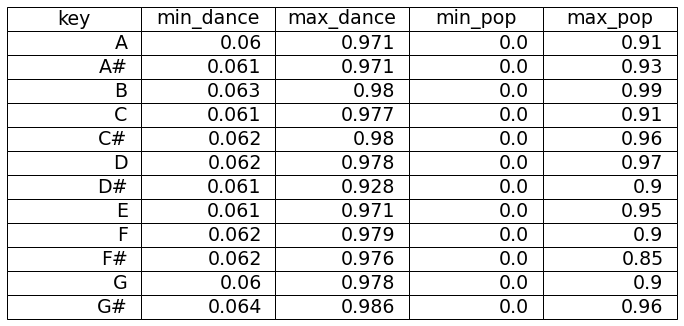

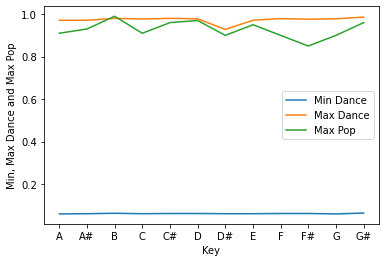

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# grab danceability, popularity, and key from the table we just created in SQL
# we likely can also do this using dataframes exclusively
query = """
        SELECT 
            key,
            ROUND(MIN(danceability), 3) min_dance, 
            ROUND(MAX(danceability), 3) max_dance, 
            ROUND(MIN(popularity), 3) min_pop, 
            ROUND(MAX(popularity) * 0.01, 3) max_pop
        FROM 
            music
        WHERE
            danceability IS NOT NULL
        AND
            popularity IS NOT NULL                     
        GROUP BY 
            key"""

# print(pd.read_sql_query(query, conn))
df = pd.read_sql(query, conn)

# https://www.statology.org/matplotlib-table/
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')
table.set_fontsize(20)
table.scale(2, 2)
plt.show()

plt.plot(df['key'].tolist(), df['min_dance'].tolist())
plt.plot(df['key'].tolist(), df['max_dance'].tolist())
plt.plot(df['key'].tolist(), df['max_pop'].tolist())
plt.xlabel("Key")
plt.ylabel("Min, Max Dance and Max Pop")
plt.legend(["Min Dance","Max Dance", "Max Pop"])
plt.show()


#### Quick Observation
It appears the highest popular song is in the key of B. The lowest popular song is in the key of F#.

It's not easy to tell from this graph, but it appears the highest dancable song is in the key of G#, while the highest lowest dancable song is in the key of D#. 

It also appears to be consistent that regardless of key, you can always have a song in a key that isn't very danceable.

### Other Plots

Plots as reviewed from the original [dataset](https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre) on Kaggle. Example [here](https://www.kaggle.com/code/ayalaco/comprehensive-eda-class-consolidation-and-svm).

I wanted to try and play around with other visuals to get a better sense of the data, so this is that attempt.

##### Popularity

<AxesSubplot:xlabel='key', ylabel='popularity'>

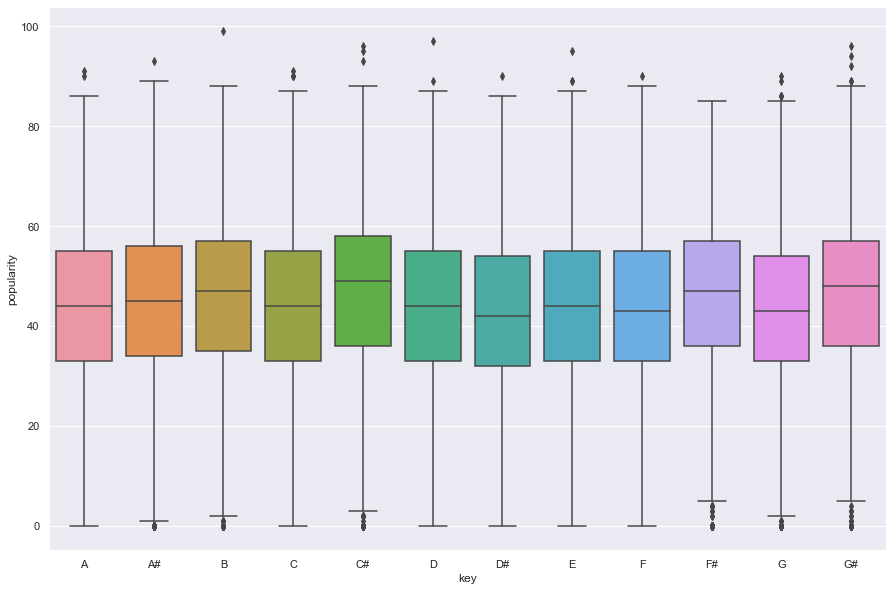

In [4]:
import seaborn as sns
sns.set(rc={"figure.figsize":(15, 10)}) #width, #height
sns.boxplot(x=plot_data['key'], y = plot_data['popularity'], data=plot_data)

Looking at the above boxplot, it appears that this reinforces that on average, songs in the key of C# have the highest popularity, and on average, the lowest is in the key of D# (looking at the median line).

We also can see that there's an outlier for a song in key of B being the highest popular song in the data.

<AxesSubplot:xlabel='key', ylabel='popularity'>

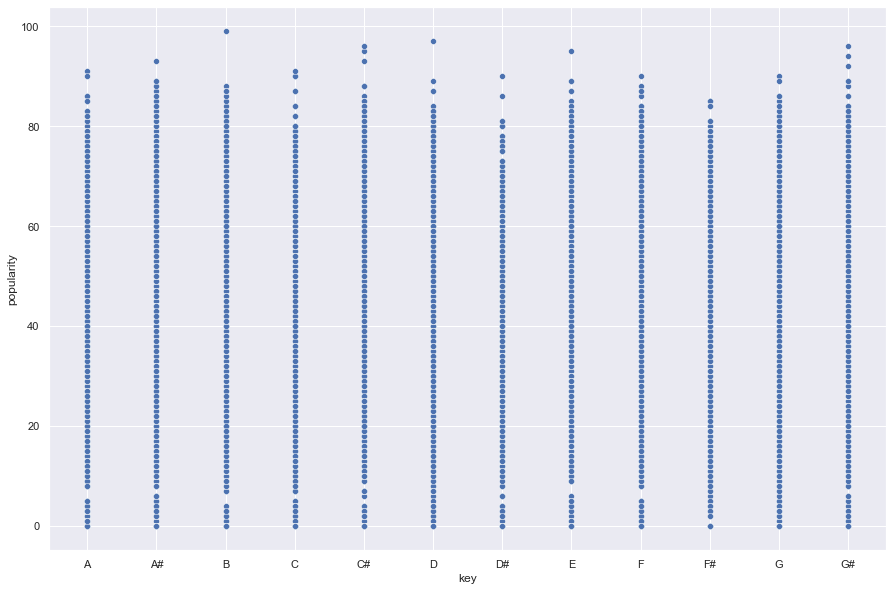

In [5]:
sns.scatterplot(x=plot_data['key'], y = plot_data['popularity'], data=plot_data)

The scatter plot above doesn't show much other insights, but it does reinforce that there was an outlier for popularity in the key of B.

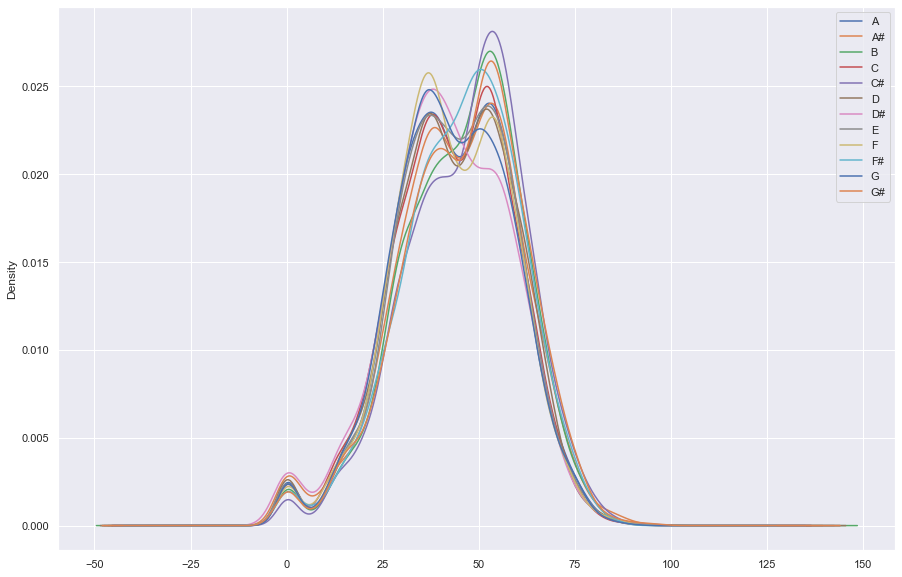

In [77]:
plot_data.groupby('key')['popularity'].plot.kde()
plt.legend()
plt.show()

##### Danceability

<AxesSubplot:xlabel='key', ylabel='danceability'>

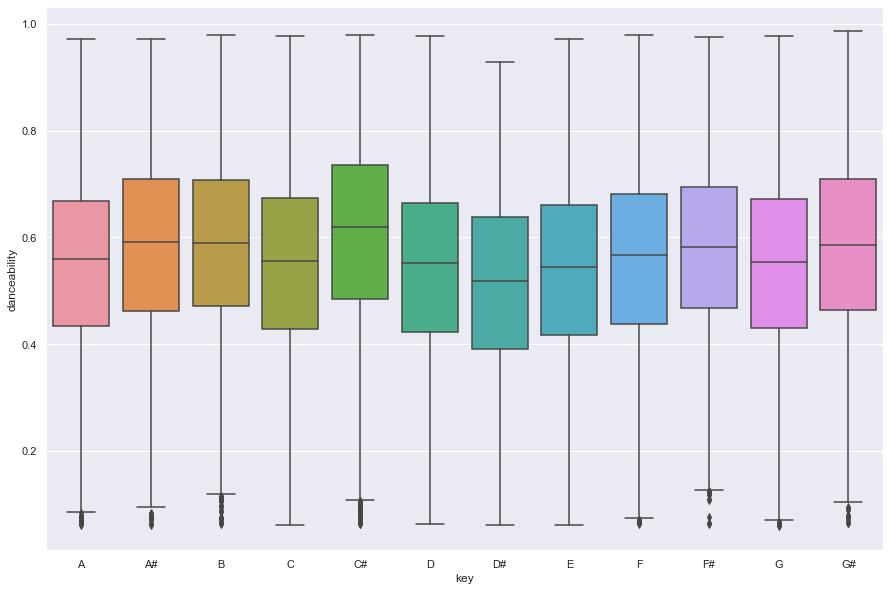

In [6]:
import seaborn as sns
sns.set(rc={"figure.figsize":(15, 10)}) #width, #height
sns.boxplot(x=plot_data['key'], y = plot_data['danceability'], data=plot_data)

This boxplot also reinforces that the most popular songs on average appear to be in the key of C#, and again, the lowest popular songs on average are in the key of D#.

<AxesSubplot:xlabel='key', ylabel='danceability'>

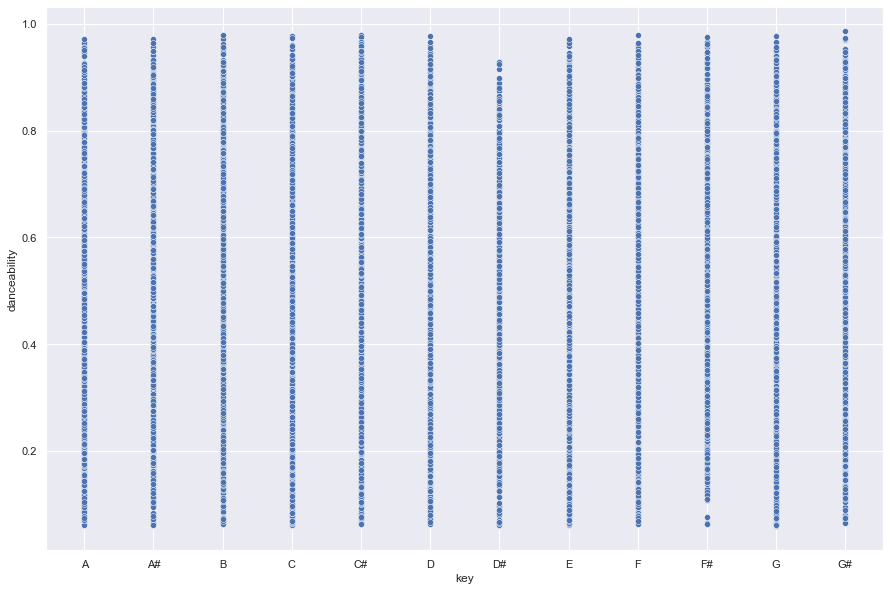

In [7]:
sns.scatterplot(x=plot_data['key'], y = plot_data['danceability'], data=plot_data)

This scatter plot doesn't reveal much other than that there are some outliers scoring low for songs in the key of F#. This is also supported by the previous boxplot.

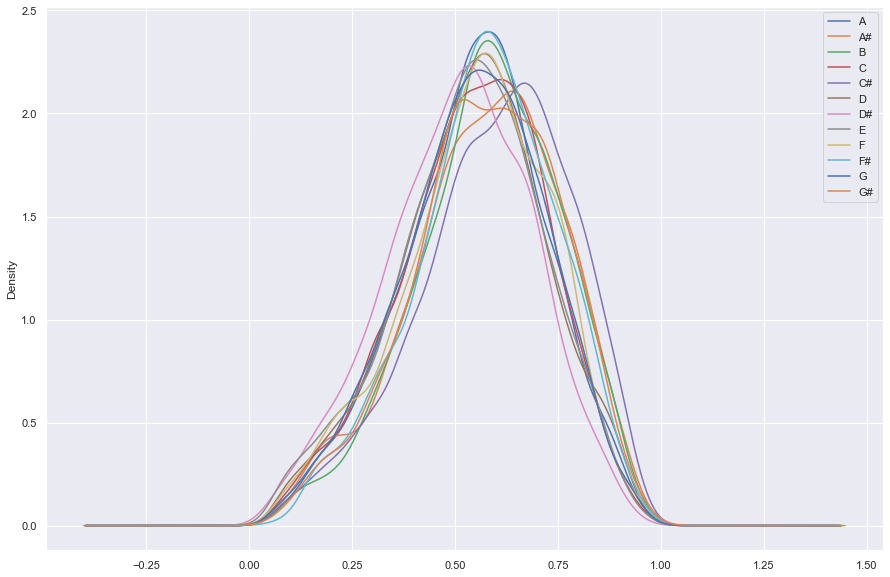

In [8]:
plot_data.groupby('key')['danceability'].plot.kde()
plt.legend()
plt.show()

# Initial Conclusions

It would appear that there's a strong correlation between songs that are popular and danceable. It would also appear that if an artist wanted to try and write a popular song that people could dance to, it might make sense to write it in the key of C#.